In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

In [3]:
df = pd.read_csv('gene_expression.csv')

In [4]:
df.head()

,Gene One,Gene Two,Cancer Present
0,4.3,3.9,1
1,2.5,6.3,0
2,5.7,3.9,1
3,6.1,6.2,0
4,7.4,3.4,1


In [5]:
df['Cancer Present'].value_counts()

1    1500
0    1500
Name: Cancer Present, dtype: int64

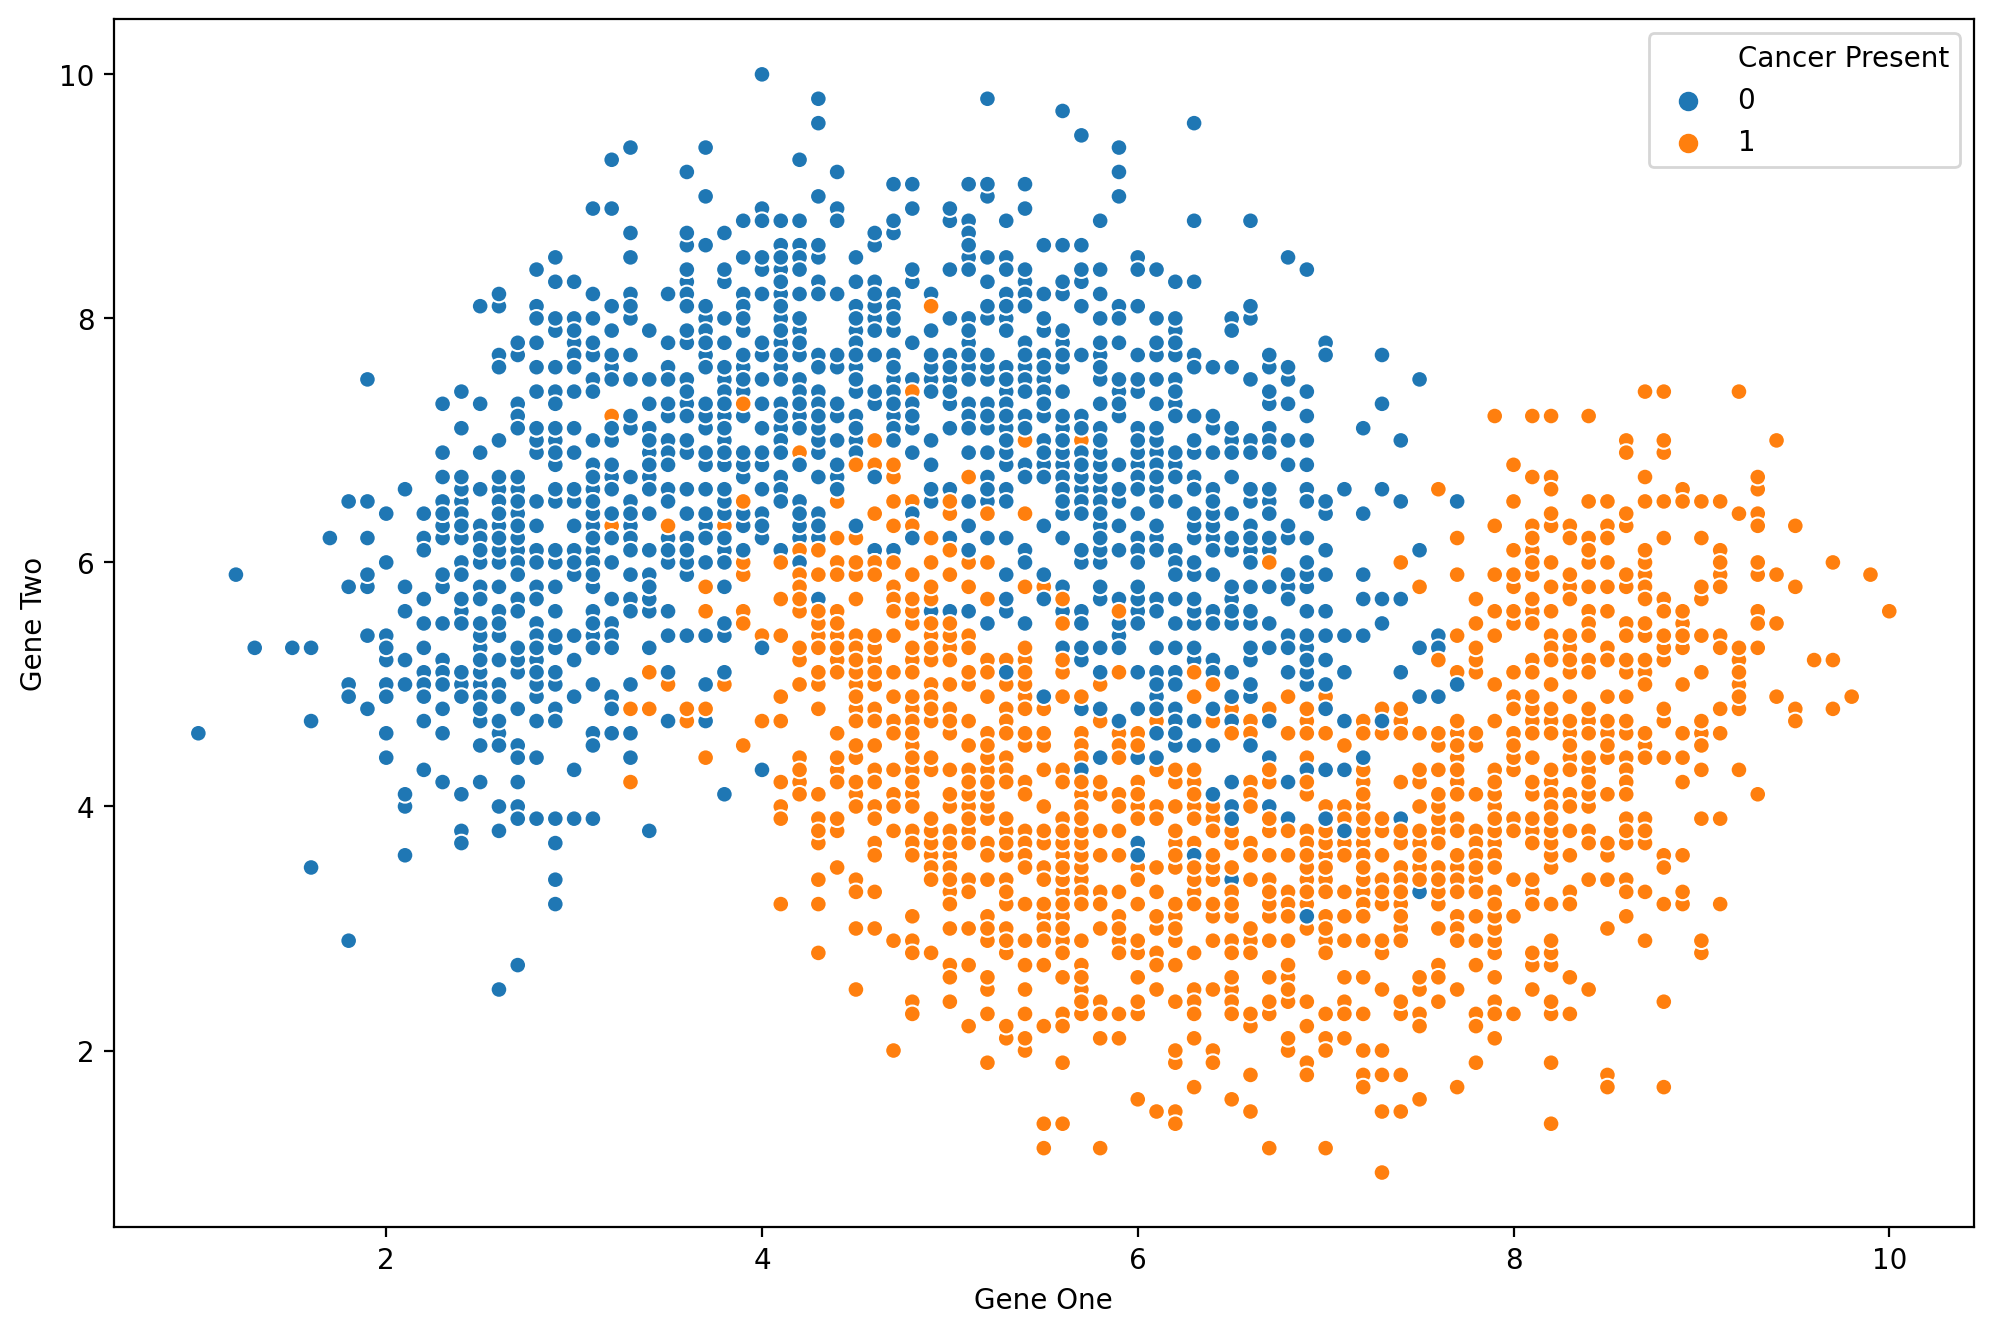

In [6]:
plt.figure(figsize  = (12,8),dpi = 200)
sns.scatterplot(x = 'Gene One',y = 'Gene Two',hue = 'Cancer Present',data=df)

In [7]:
a = df[df['Gene Two']>= 8 ]
b = df[df['Cancer Present'] == 1]

In [8]:
pd.merge(a,b,how='inner')

,Gene One,Gene Two,Cancer Present
0,4.9,8.1,1


In [9]:
#df[df['Gene One'] == 4.9]

In [10]:
X = df.drop('Cancer Present',axis=1)
y = df['Cancer Present']

In [11]:
len(X),len(y)

(3000, 3000)

In [12]:
type(X)

pandas.core.frame.DataFrame

In [14]:
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

In [15]:
scaler =  StandardScaler()

In [16]:
scaled_X_train =scaler.fit_transform(X_train)


In [17]:
scaled_X_test = scaler.transform(X_test)

In [18]:
knn = KNeighborsClassifier()

In [19]:
operations = [('scaler',scaler),('knn',knn)]

In [20]:
k_values = list(range(1,20))

In [21]:
param_grid = {'knn__n_neighbors':k_values}

In [22]:
from sklearn.pipeline import Pipeline

In [23]:
pipe = Pipeline(operations)

In [24]:
grid_model = GridSearchCV(pipe,param_grid=param_grid,cv=5,scoring='accuracy')

In [25]:
grid_model.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('knn', KNeighborsClassifier())]),
             param_grid={'knn__n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                              12, 13, 14, 15, 16, 17, 18, 19]},
             scoring='accuracy')

In [26]:
y_pred = grid_model.predict(X_test)

In [27]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [28]:
confusion_matrix(y_test,y_pred)

array([[125,  11],
       [ 12, 152]], dtype=int64)

In [29]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.91      0.92      0.92       136
           1       0.93      0.93      0.93       164

    accuracy                           0.92       300
   macro avg       0.92      0.92      0.92       300
weighted avg       0.92      0.92      0.92       300



In [30]:
errorss = []
for k in range(1,20):
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(scaled_X_train,y_train)
    y_pred = model.predict(X_test)
    error = 1 - accuracy_score(y_test,y_pred)
    errorss.append(error)

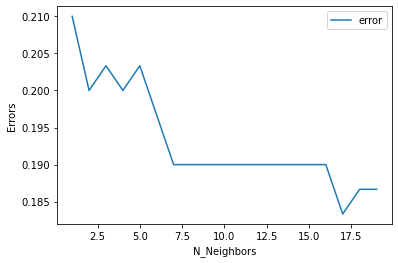

In [31]:
plt.plot(range(1,20),errorss,label = 'error')
plt.xlabel('N_Neighbors')
plt.ylabel('Errors')
plt.legend()

In [32]:
errorss

[0.20999999999999996,
 0.19999999999999996,
 0.20333333333333337,
 0.19999999999999996,
 0.20333333333333337,
 0.19666666666666666,
 0.18999999999999995,
 0.18999999999999995,
 0.18999999999999995,
 0.18999999999999995,
 0.18999999999999995,
 0.18999999999999995,
 0.18999999999999995,
 0.18999999999999995,
 0.18999999999999995,
 0.18999999999999995,
 0.18333333333333335,
 0.18666666666666665,
 0.18666666666666665]

In [33]:
new_model = KNeighborsClassifier(n_neighbors=7)
new_model.fit(scaled_X_train,y_train)
new_pred = new_model.predict(scaled_X_test)


In [34]:
print(classification_report(new_pred,y_test))

              precision    recall  f1-score   support

           0       0.91      0.92      0.92       135
           1       0.93      0.93      0.93       165

    accuracy                           0.92       300
   macro avg       0.92      0.92      0.92       300
weighted avg       0.92      0.92      0.92       300



In [ ]:
from tree.py import model_